## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
# Input data
x_points = np.arange(20)
#x_points = np.linspace(0,10,20)

In [3]:
# Actual output
y_points = -2 * x_points + 1
#y_points = 2 * x_points + (5*np.random.random(20))
y_points = y_points.reshape(20,1)

In [4]:
# Constructing input matrix: 
# y = theta0*x0 + theta1*x1
# x0 = vector of ones , x1 = vector of input data
x0 = np.ones_like(x_points)

x_matrix = np.array([x0, x_points]).T
x_matrix.shape

(20, 2)

Text(0.5, 1.0, 'Data Points')

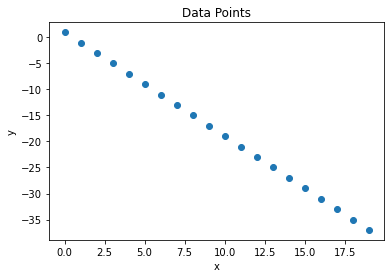

In [5]:
# Exploring Data Points:
plt.scatter(x_points, y_points);
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [6]:
# return the MSE between actual and predicted output
def loss(predicted, actual=y_points):
    diff = predicted - actual
    return (1/(2*len(actual))) * (norm(diff, 2))**2

In [7]:
# return jacobian vector
def jacob_single(hx, y=y_points, x=x_matrix):
    return ((1 / hx.shape[0]) * ((hx - y).T @ x)).T

# Batch Gradient descent:

In [28]:
def batch_gd(x, y, alpha, n=0):
    """
    Description:
    Apply batch gradient descent on to optimize parameters of linear regression model
    
    Args:
    x : input matrix
    y : actual output
    alpha : learning rate
    
    Returns:
    n(int) : Number of iterations
    p(array) : vector of final updated parameters
    mean_sq_error(list) : list of MSE after each epoch
    parameters(list) : list of updated parameters after each epoch
    Hx(list) :list contains predicted output after each epoch
    """
    # initial parameters:
    p = np.array([[0],[0]])
    # Predicted output
    hx = x @ p
    # List to contain MSE after each Epoch
    mean_sq_error = []
    # Parameters:
    parameters = []
    # Predicted output list contains hx after each epoch
    Hx = []
    # jacobian norm change over iterations:
    jacob_norm = []
    # hold Number of iterations
    n = 0
    while(norm(jacob_single(hx), 2)) > 0.01:
        
        # Updating parameters
        updated_p = p -  alpha * jacob_single(hx)

        p = updated_p
        
        # Updating predicted outputs
        hx = x @ p
        
        Hx.append(hx)
        parameters.append(updated_p)
        mean_sq_error.append(loss(hx))
        jacob_norm.append(norm(jacob_single(hx), 2))
        # counter of iterations
        n += 1
    return n, p, mean_sq_error, parameters, Hx, jacob_norm

#### Try your function with any input parameterss of your choice.

In [9]:
# Calling batch gd function:
n, p, mse, parameters, Hx, jacob_norm = batch_gd(x_matrix, y_points, 0.01)

In [10]:
print("Number of Iterations:", n)

Number of Iterations: 1279


#### Calculate r2 score

In [11]:
from sklearn.metrics import r2_score

y_predicted = x_matrix @ p

r2_score(y_points, y_predicted)

0.999997192160141

#### Plot loss vs. epochs

Text(0, 0.5, 'MSE')

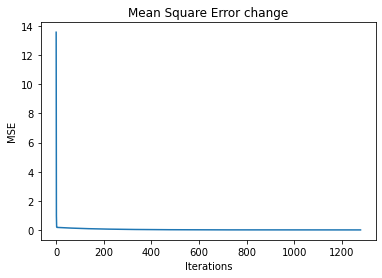

In [12]:
# MSE vs epochs
plt.plot(mse)
plt.title("Mean Square Error change")
plt.xlabel("Iterations")
plt.ylabel("MSE")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [13]:
theta0 = []
theta1 = []
for p in parameters:
    theta0.append(p[0])
    theta1.append(p[1])

Text(0, 0.5, 'theta0')

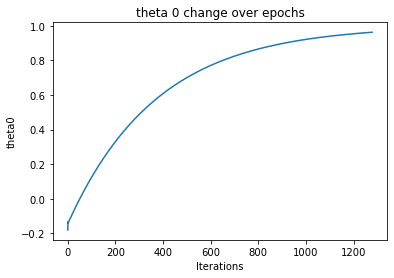

In [14]:
plt.plot(theta0)
plt.title("theta 0 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta0")

Text(0, 0.5, 'theta1')

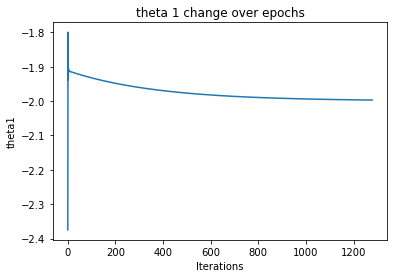

In [15]:
plt.plot(theta1)
plt.title("theta 1 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta1")

#### Plot all regression lines till converge

Text(0.5, 1.0, 'Data Points vs Predicted Regression line')

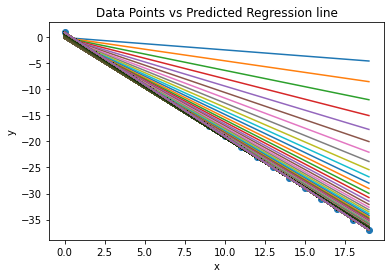

In [16]:
plt.scatter(x_points, y_points);

for hx in Hx:
    plt.plot(x_points, hx);
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")

#### Plot the best regression line

Text(0.5, 1.0, 'Data Points vs Predicted Regression line')

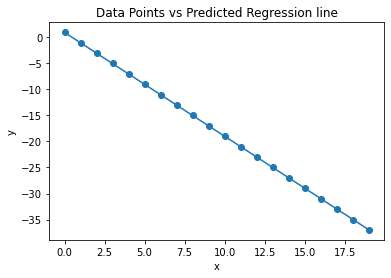

In [16]:
# Plotting regression line vs actual data
plt.scatter(x_points, y_points);
plt.plot(x_points, y_predicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [56]:
# Calling batch gd function:
# alpha = 0.015 instead of 0.001
n, p, mse, parameters, Hx, jacob_norm = batch_gd(x_matrix, y_points, 0.015)

In [57]:
# number of iterations decreases from 12,000 to 850
print("Number of Iterations:", n)

Number of Iterations: 853


In [58]:
from sklearn.metrics import r2_score

y_predicted = x_matrix @ p

r2_score(y_points, y_predicted)

0.9999972125361153

Text(0, 0.5, 'MSE')

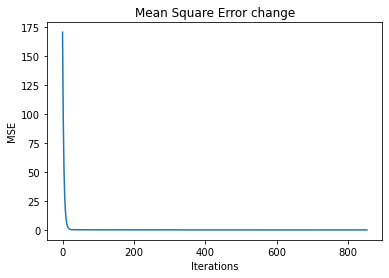

In [59]:
# MSE vs epochs
plt.plot(mse)
plt.title("Mean Square Error change")
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [60]:
theta0 = []
theta1 = []
for p in parameters:
    theta0.append(p[0])
    theta1.append(p[1])

In [61]:
len(theta0)

853

Text(0, 0.5, 'theta0')

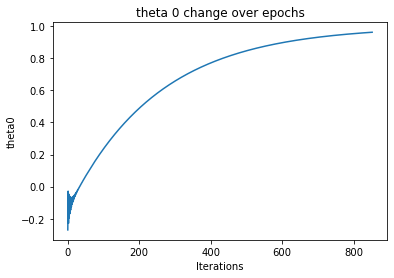

In [62]:
plt.plot(theta0)
plt.title("theta 0 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta0")

Text(0, 0.5, 'mse')

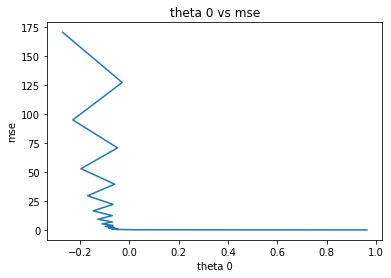

In [67]:
plt.plot(theta0, mse)
plt.title("theta 0 vs mse")
plt.xlabel("theta 0")
plt.ylabel("mse")

In [ ]:
plt.plot(theta1, mse)
plt.title("theta1 vs mse")
plt.xlabel("theta ")
plt.ylabel("mse")

Text(0, 0.5, 'theta1')

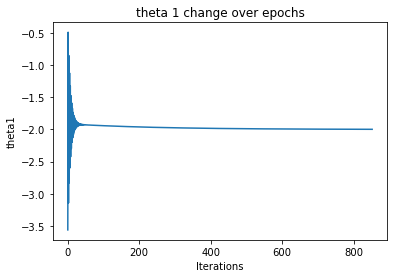

In [64]:
plt.plot(theta1)
plt.title("theta 1 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta1")

Text(0.5, 1.0, 'Data Points vs Predicted Regression line')

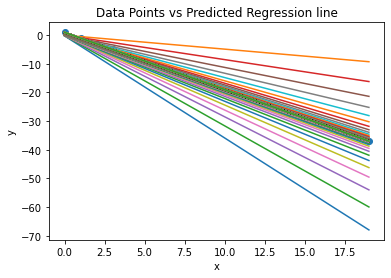

In [25]:
plt.scatter(x_points, y_points);

for hx in Hx:
    plt.plot(x_points, hx);
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")

Text(0.5, 1.0, 'Data Points vs Predicted Regression line')

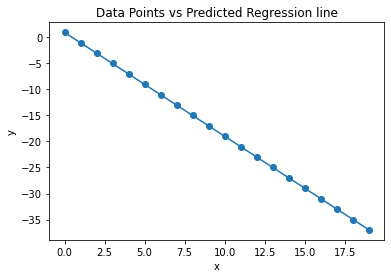

In [26]:
# Plotting regression line vs actual data
plt.scatter(x_points, y_points);
plt.plot(x_points, y_predicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")

# Mini-Batch Gradient Descent:

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [27]:
# input and actual output
#x_points = np.arange(20)
#y_points = (-2 * x_points + 1).reshape(20,1)

In [28]:
# Divide data into mini-batches
x_batches = np.split(x_matrix, 4)
y_batches = np.split(y_points, 4)

In [29]:
x_matrix , y_points

(array([[ 1,  0],
        [ 1,  1],
        [ 1,  2],
        [ 1,  3],
        [ 1,  4],
        [ 1,  5],
        [ 1,  6],
        [ 1,  7],
        [ 1,  8],
        [ 1,  9],
        [ 1, 10],
        [ 1, 11],
        [ 1, 12],
        [ 1, 13],
        [ 1, 14],
        [ 1, 15],
        [ 1, 16],
        [ 1, 17],
        [ 1, 18],
        [ 1, 19]]),
 array([[  1],
        [ -1],
        [ -3],
        [ -5],
        [ -7],
        [ -9],
        [-11],
        [-13],
        [-15],
        [-17],
        [-19],
        [-21],
        [-23],
        [-25],
        [-27],
        [-29],
        [-31],
        [-33],
        [-35],
        [-37]]))

In [30]:
x_batches[0],y_batches[0]

(array([[1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4]]),
 array([[ 1],
        [-1],
        [-3],
        [-5],
        [-7]]))

In [31]:
# Constructing input matrix:
#x0 = np.ones_like(x_points)
#x_matrix = np.array([x0, x_points]).T
#x_matrix.shape

In [32]:
def mini_batch(x, y, alpha):
    """
    Description:
    Apply Mini-batch gradient descent on to optimize parameters of linear regression model
    
    Args:
    x : input matrix
    y : actual output
    alpha : learning rate
    
    Returns:
    n(int) : Number of iterations
    p(array) : vector of final updated parameters
    mean_sq_error(list) : list of MSE after each epoch
    parameters(list) : list of updated parameters after each epoch
    Hx(list) :list contains predicted output after each epoch
    """
    # initial parameters:
    p = np.array([[0],[0]])
    # Predicted output
    hx = x @ p
    # List to contain MSE after each Epoch
    mean_sq_error = []
    # Parameters:
    parameters = []
    # Predicted output list contains hx after each epoch
    Hx = []
    # hold Number of iterations
    n = 0
    while(norm(jacob_single(hx, y, x), 2)) > 0.01:
        for i in range(len(x_batches)):
            hx = x_batches[i] @ p
            updated_p = p -  alpha * jacob_single(hx, y_batches[i], x_batches[i])

            p = updated_p
        
        hx = x_matrix @ updated_p
        print(norm(jacob_single(hx, y, x), 2))
        Hx.append(hx)
        parameters.append(updated_p)
        mean_sq_error.append(loss(hx))
    
        # counter of iterations
        n += 1
        
    return n, p, mean_sq_error, parameters, Hx

In [33]:
n_mini, p_mini, mse_mini, parameters_mini, Hx_mini = mini_batch(x_matrix, y_points, 0.01)

91.60382863701206
31.86179645854152
7.558518352827829
2.3253265416190665
6.260251613287659
7.802899757916808
8.365723077796009
8.529372652471174
8.530950334717398
8.467218743680768
8.377656227353649
8.278362831495633
8.175898308744413
8.072929340300337
7.970534066393742
7.869142511616142
7.768920347781963
7.669925496201567
7.572172031447789
7.4756562572571275
7.380367345876129
7.286291678168322
7.193414613185455
7.1017212087886135
7.011196514239035
6.921825688139562
6.833594045125093
6.746487073496139
6.660490441011221
6.575589995868123
6.491771765736291
6.4090219560139685
6.32732694778402
6.246673295665714
6.167047725639319
6.0884371328772025
6.01082857959287
5.9342092929143835
5.85856666278359
5.783888239880745
5.710161733575948
5.637375009906218
5.565516089579086
5.494573146000287
5.424534503327642
5.35538863454984
5.28712415958853
5.219729843426035
5.153194594256196
5.087507461658458
5.022657634795937
4.958634440636361
4.895427342195084
4.833025936801323
4.7714199543855385
4.710599

In [34]:
print("Number of Iterations:", n_mini)

Number of Iterations: 536


In [35]:
from sklearn.metrics import r2_score

y_predicted_mini = x_matrix @ p_mini

r2_score(y_points, y_predicted_mini)

0.9999999900555158

Text(0, 0.5, 'MSE')

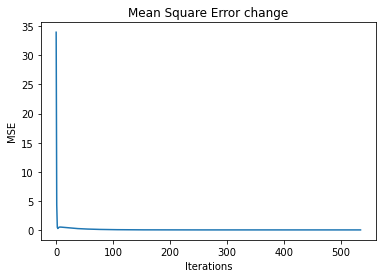

In [36]:
# MSE vs epochs
plt.plot(mse_mini)
plt.title("Mean Square Error change")
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [37]:
theta0_mini = []
theta1_mini = []
for p in parameters_mini:
    theta0_mini.append(p[0])
    theta1_mini.append(p[1])

Text(0, 0.5, 'theta0')

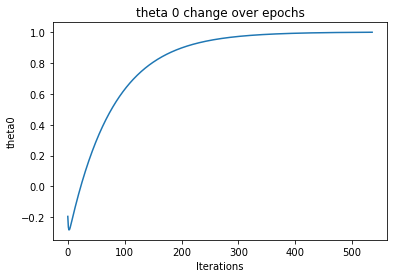

In [38]:
plt.plot(theta0_mini)
plt.title("theta 0 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta0")

Text(0, 0.5, 'theta1')

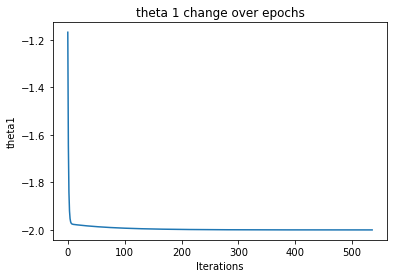

In [39]:
plt.plot(theta1_mini)
plt.title("theta 1 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta1")

In [ ]:
plt.scatter(x_points, y_points);

for hx in Hx_mini:
    plt.plot(x_points, hx);
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression lines")

Text(0.5, 1.0, 'Data Points vs Predicted Regression lines')

In [ ]:
# Plotting regression line vs actual data
plt.scatter(x_points, y_points);
plt.plot(x_points, y_predicted_mini)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [ ]:
# input and actual output
x_points = np.arange(20)
y_points = (-2 * x_points + 1).reshape(20,1)

In [ ]:
# Divide data into mini-batches : each batch contains 1 element
x_batches = np.split(x_matrix, 20)
y_batches = np.split(y_points, 20)

In [ ]:
# Constructing input matrix:
x0 = np.ones_like(x_points)
x_matrix = np.array([x0, x_points]).T
x_matrix.shape

In [ ]:
# Calling mini-batch function implemented above with batches contains one element only(Stochastic)
n_stoc, p_stoc, mse_stoc, parameters_stoc, Hx_stoc = mini_batch(x_matrix, y_points, 0.001)

In [ ]:
print("Number of Iterations:", n_stoc)

In [ ]:
from sklearn.metrics import r2_score

y_predicted_stoc = x_matrix @ p_stoc

r2_score(y_points, y_predicted_stoc)

In [ ]:
# MSE vs epochs
plt.plot(mse_stoc)
plt.title("Mean Square Error change")
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [ ]:
theta0_stoc = []
theta1_stoc = []
for p in parameters_stoc:
    theta0_stoc.append(p[0])
    theta1_stoc.append(p[1])

In [ ]:
plt.plot(theta0_stoc)
plt.title("theta 0 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta0")

In [ ]:
plt.plot(theta1_stoc)
plt.title("theta 1 change over epochs")
plt.xlabel("Iterations")
plt.ylabel("theta1")

In [ ]:
plt.scatter(x_points, y_points);

for hx in Hx_stoc:
    plt.plot(x_points, hx);
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression lines")

In [ ]:
# Plotting regression line vs actual data (Best line)
plt.scatter(x_points, y_points);
plt.plot(x_points, y_predicted_stoc)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points vs Predicted Regression line")